In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from config import *
plt.rcParams['font.family'] = 'Arial'

In [2]:
with open('data/fig4/regression_results_7r.pkl', 'rb') as f:
    data = pickle.load(f)

print(data)

{'model_results': {'r2': 0.7558679947658218, 'adj_r2': 0.7382502211922213, 'feature_names': ['dtmt', 'dauto_trip', 'davg_rg', 'deltaKS_f19', 'pop_gini_f19', 'uci_f19', 'vmt_f19'], 'raw_params': {'const': 8.573104980398352, 'dtmt': 0.08484841242888298, 'dauto_trip': 14.036483388356354, 'davg_rg': 0.7160027774771748, 'deltaKS_f19': -2.8453607758179422, 'pop_gini_f19': -14.00916413080995, 'uci_f19': -4.050548960738293, 'vmt_f19': -0.15761219606637714}, 'raw_pvalues': {'const': 0.07135201324392876, 'dtmt': 0.8267415804835857, 'dauto_trip': 8.157242708263883e-27, 'davg_rg': 0.007621196702163198, 'deltaKS_f19': 0.22433939943681427, 'pop_gini_f19': 0.009126235183417254, 'uci_f19': 0.5067643800631687, 'vmt_f19': 0.050237941454528624}, 'raw_tvalues': {'const': 1.8232072346675412, 'dtmt': 0.21947456200590518, 'dauto_trip': 14.898295594863498, 'davg_rg': 2.7253641459036637, 'deltaKS_f19': -1.2228758100415704, 'pop_gini_f19': -2.6606936443891454, 'uci_f19': -0.666357542745552, 'vmt_f19': -1.982624

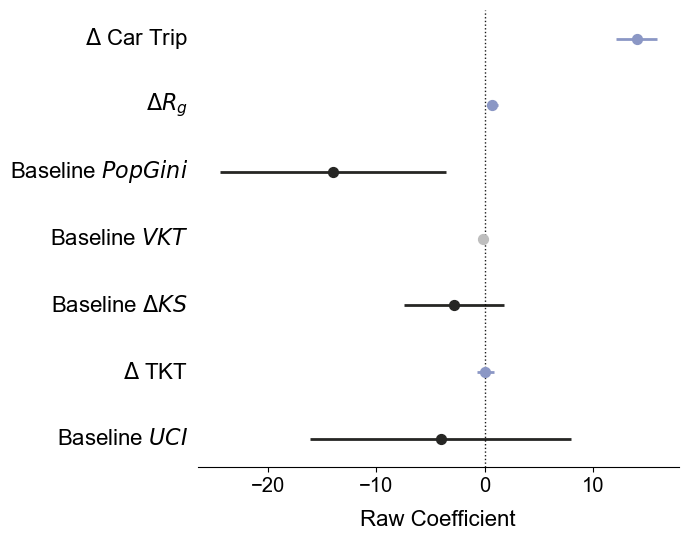

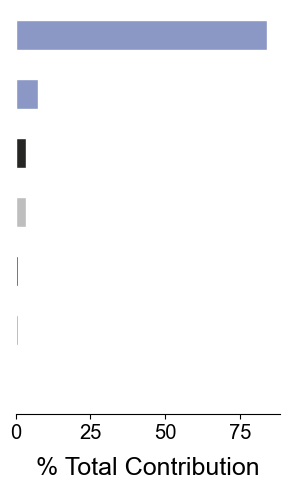

In [ ]:
def plot_coeff(save_path=None):
    fig, ax = plt.subplots(1, 1, figsize=(7, 5.5))
    
    features = data['model_results']['feature_names']
    raw_params = data['model_results']['raw_params']
    raw_ci = data['model_results']['raw_conf_int']
    
    plot_data = []
    for i, var in enumerate(features):
        color = next(colors[k] for k, v in groups.items() if var in v)
        label = labels[var]
        
        plot_data.append({
            'label': label,
            'raw_coef': raw_params[var],
            'raw_lower': raw_ci[0][var],
            'raw_upper': raw_ci[1][var],
            'color': color,
            'var': var,
            'lmg': data['lmg_var_results'][var]
        })
    
    # sort by LMG composition
    plot_data.sort(key=lambda x: x['lmg'])
    
    # plot
    y_pos = np.linspace(0.5, len(plot_data) + 0.5, len(plot_data))
    for i, d in enumerate(plot_data):
        ax.errorbar(d['raw_coef'], y_pos[i], 
                   xerr=[[d['raw_coef'] - d['raw_lower']], [d['raw_upper'] - d['raw_coef']]],
                   fmt='none', color=d['color'], linewidth=2, capsize=0)
        ax.scatter(d['raw_coef'], y_pos[i], color=d['color'], s=50, zorder=5)
        ax.text(-0.02, y_pos[i], d['label'], ha='right', va='center', fontsize=16,
               transform=ax.get_yaxis_transform())
    
    # cust
    ax.axvline(x=0, color='black', linestyle=':', alpha=0.9, linewidth=1)
    ax.set_xlabel('Raw Coefficient', fontsize=16, labelpad=10)
    ax.tick_params(axis='x', labelsize=14.5)
    ax.set_yticks([])
    ax.set_ylim(0, len(plot_data) + 1)
    
    for spine in ['right', 'left', 'top']:
        ax.spines[spine].set_visible(False)
    
    plt.tight_layout()
    plt.show()


def plot_lmg_bars(save_path=None):
    lmg_var_results = data['lmg_var_results']
    total_r2 = data['model_results']['r2']
    
    plot_data = []
    for var, lmg_val in lmg_var_results.items():
        var_color = None
        for group_key, group_vars in groups.items():
            if var in group_vars:
                var_color = colors[group_key]
                break
        
        pct_contribution = (lmg_val / total_r2) * 100
        
        plot_data.append({
            'var': var,
            'label': labels[var],
            'lmg': lmg_val,
            'pct': pct_contribution,
            'color': var_color
        })
    
    # sort by LMG descending
    plot_data.sort(key=lambda x: x['lmg'], reverse=False)
    
    pct_values = [d['pct'] for d in plot_data]
    bar_colors = [d['color'] for d in plot_data]
    
    # plot
    fig, ax = plt.subplots(figsize=(3, 5))
    n_vars = len(plot_data)
    y_pos = np.linspace(0.5, n_vars + 0.5, n_vars)
    bars = ax.barh(y_pos, pct_values, color=bar_colors, edgecolor='white', linewidth=1, height=0.6)
    
    ax.set_xlabel('% Total Contribution', fontsize=18, labelpad=10)
    ax.set_yticks([])
    ax.tick_params(axis='x', labelsize=14.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.grid(False)
    
    ax.set_ylim(0, n_vars + 1)
    
    plt.tight_layout()
    plt.show()

# run
plot_coeff()
plot_lmg_bars()

In [4]:
lmg_vars = data['lmg_var_results']
total_r2 = data['model_results']['r2']

rows = []
for var, lmg_val in lmg_vars.items():
    pct_contribution = (lmg_val / total_r2) * 100
    rows.append((var, labels[var], lmg_val, pct_contribution))
rows.sort(key=lambda x: x[2])

for var, label, lmg, pct in rows:
    print(f"{var:15s} | {label:25s} | LMG = {lmg:.4f} | % = {pct:.2f}")

uci_f19         | Baseline $UCI$            | LMG = 0.0015 | % = 0.20
dtmt            | $\Delta$ TKT              | LMG = 0.0048 | % = 0.64
deltaKS_f19     | Baseline $\Delta KS$      | LMG = 0.0058 | % = 0.76
vmt_f19         | Baseline $VKT$            | LMG = 0.0258 | % = 3.41
pop_gini_f19    | Baseline $PopGini$        | LMG = 0.0258 | % = 3.41
davg_rg         | $\Delta R_g$              | LMG = 0.0562 | % = 7.44
dauto_trip      | $\Delta$ Car Trip         | LMG = 0.6360 | % = 84.14
